# IMPORTS

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
import folium 

from warnings import filterwarnings

filterwarnings('ignore')
%matplotlib inline

# READ THE DATA (main .csv file with data and .txt file with countries corrds)

In [2]:
data = pd.read_csv('./input/mad_project.csv')
locations = pd.read_csv('./input/loc_df.txt')
#data.head()
data.tail()

,countrycode,country,year,gdppc,pop
21677,ZWE,Zimbabwe,2014,1 594,13 314
21678,ZWE,Zimbabwe,2015,1 560,13 479
21679,ZWE,Zimbabwe,2016,1 534,13 665
21680,ZWE,Zimbabwe,2017,1 582,13 870
21681,ZWE,Zimbabwe,2018,1 611,14 097


In [3]:
locations

,CountryCode,Latitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


# TRY TO SHOW MAP WITH FOLIUM LIBRARY

In [4]:
countries = data['country'].unique()

In [5]:
local_ = {country: (lat, lon) for lat, lon, country in zip(locations['Latitude'], locations['Longitude'], locations['Name'])}

In [6]:
map = folium.Map(location=local_['Former USSR'])
for corr in local_:
    folium.Marker(local_[corr], popup=f'<b>{corr}</b>', tooltip=f'Iam {corr}').add_to(map)

In [7]:
map

# OK ITS WORKS. LETS GO TO ANOTHER TASKS

# SOME EDA 

In [8]:
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3 280
1,AFG,Afghanistan,1870,NaN,4 207
2,AFG,Afghanistan,1913,NaN,5 730
3,AFG,Afghanistan,1950,1 156,8 150
4,AFG,Afghanistan,1951,1 170,8 284


In [9]:
data.dropna(inplace=True)

In [10]:
data['pop'].isnull().sum()

0

In [11]:
data['pop'] = data['pop'].apply(lambda x: int(''.join(x.split())))

In [12]:
data.drop('countrycode', axis=1, inplace=True)

In [13]:
data = data.reset_index()

In [14]:
data.drop('index', axis=1, inplace=True)

In [15]:
data = data.rename(columns={'gdppc':'vvp', 'pop': 'population'})

In [16]:
map_pop = data.groupby(by=['country'])['population'].sum().sort_values(ascending=False)

In [17]:
lr_pop = map_pop[:10]

In [18]:
lr_pop = dict(lr_pop)

In [19]:
lr_pop

{'China': 79228912,
 'India': 76268955,
 'United States': 25026726,
 'Former USSR': 22598742,
 'Indonesia': 16040141,
 'Japan': 11719157,
 'Brazil': 11181227,
 'Germany': 10758001,
 'France': 8891882,
 'United Kingdom': 8678298}

In [20]:
lr_pop = pd.DataFrame({'Country': lr_pop.keys(), 'Pop_growth': [lr_pop[x] for x in lr_pop.keys()]})

In [21]:
lr_pop

,Country,Pop_growth
0,China,79228912
1,India,76268955
2,United States,25026726
3,Former USSR,22598742
4,Indonesia,16040141
5,Japan,11719157
6,Brazil,11181227
7,Germany,10758001
8,France,8891882
9,United Kingdom,8678298


<AxesSubplot:title={'center':'Top 10 Countries with highest population growth (until 2018)'}, xlabel='Country', ylabel='Pop_growth'>

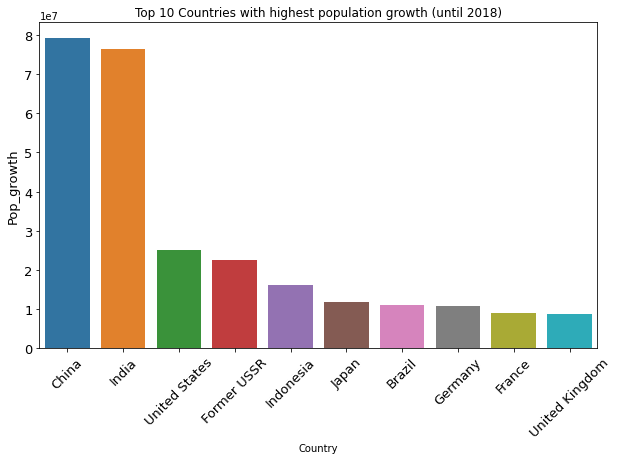

In [22]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Countries with highest population growth (until 2018)')
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.ylabel('Pop_growth', size=13)


sns.barplot(data=lr_pop, x='Country', y='Pop_growth')

# Let's make our map more interactive

In [23]:
map = folium.Map(location=local_['Former USSR'], tiles='OpenStreetMap')

for country in map_pop.keys():
    if country in local_:
        folium.Marker(local_[country], popup=f'<b>Population growth: {map_pop[country]}</b>', tooltip=f'<b>{country}</b>').add_to(map)
        
map    